<a href="https://colab.research.google.com/github/horsinnaround/Works/blob/main/work%2039%20toxic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# collecting data

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"willyvonka","key":"8f44a3e08263e91a87a91f376061e5e2"}'}

In [2]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 80% 42.0M/52.6M [00:00<00:00, 114MB/s]
100% 52.6M/52.6M [00:00<00:00, 116MB/s]


In [5]:
!unzip /content/jigsaw-toxic-comment-classification-challenge.zip

Archive:  /content/jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: test_labels.csv.zip     
  inflating: train.csv.zip           


In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('/content/train.csv.zip')
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [9]:
data.drop('id',axis=1,inplace=True)

In [10]:
data.drop_duplicates(subset=['comment_text'],inplace=True)

In [11]:
data.dropna(subset=['comment_text'],inplace=True)

In [12]:
data

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [14]:
# !mkdir /content/drive/MyDrive/emotion-detection/
data.to_csv('/content/drive/MyDrive/work 39 toxisity/data.csv',index=False)

In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/work 39 toxisity/data.csv')

In [3]:
# import os
path = '/content/drive/MyDrive/work 39 toxisity/'
# os.mkdir(path)

# Work on data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# plt.rcParams['figure.figsize'] = [10,6]
# plt.rcParams['figure.dpi'] = 140
# plt.rcParams['savefig.dpi'] = 140
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data.columns

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

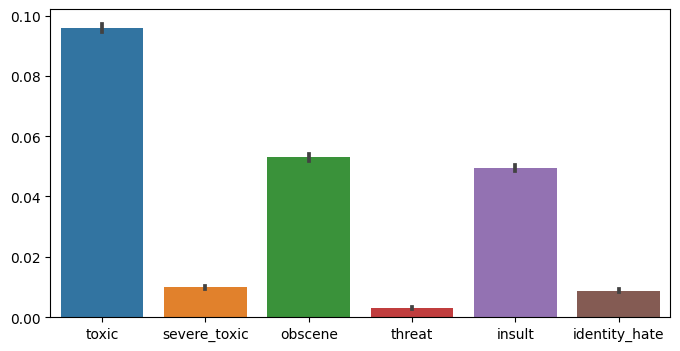

In [8]:
plt.figure(figsize=(8,4))
sns.barplot(data)
plt.show()

In [9]:
f = pd.DataFrame.from_dict(dict(data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']].sum(axis=0)), orient='index')
f

,0
toxic,15294
severe_toxic,1595
obscene,8449
threat,478
insult,7877
identity_hate,1405


In [10]:
fT = f.T
fT

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,15294,1595,8449,478,7877,1405


In [11]:
healthy = data.shape[0]-fT.sum(axis=1)[0]

In [12]:

data.shape

(159571, 7)

In [13]:
fT['healthy'] = healthy

In [14]:
f = fT.T

In [15]:
f

,0
toxic,15294
severe_toxic,1595
obscene,8449
threat,478
insult,7877
identity_hate,1405
healthy,124473


In [16]:
f['precentage'] = f[0]/f[0].sum()

In [17]:
f.drop(0,axis=1,inplace=True)

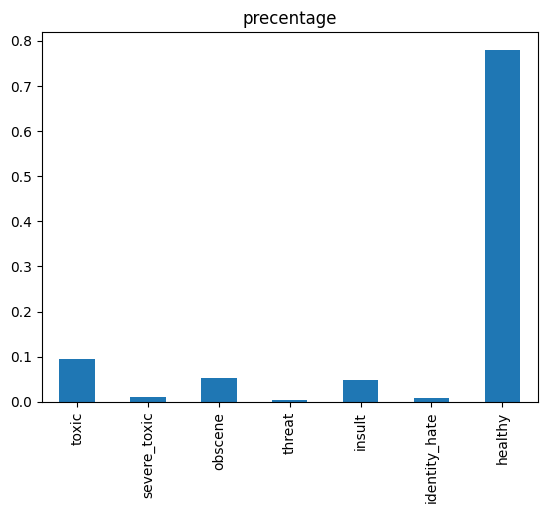

In [18]:
f.plot(kind='bar',subplots=True,legend=False)
plt.savefig(f'{path}labels_pie_all_data.png',bbox_inches='tight')
f.to_csv(f'{path}labels_pie_all_data.csv')

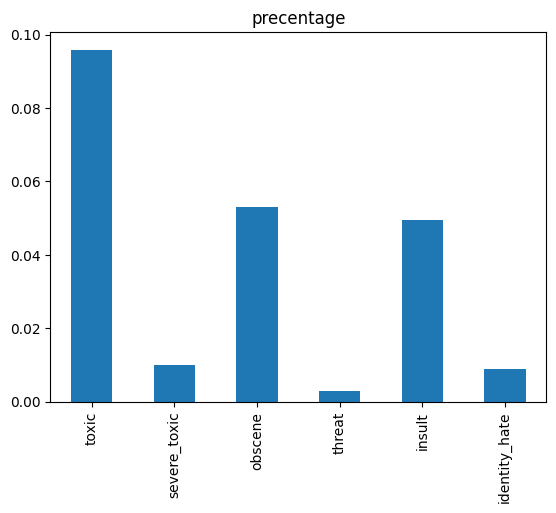

In [19]:
f.drop('healthy',axis=0).plot(kind='bar',subplots=True,legend=False)
plt.savefig(f'{path}labels_pie.png',bbox_inches='tight')
f.drop('healthy',axis=0).to_csv(f'{path}labels_pie.csv')

# Pre Processing

In [20]:
print(data.shape)
data = data.sample(frac=0.3)
print(data.shape)


(159571, 7)
(47871, 7)


In [21]:
import pandas as pd
# data = pd.read_csv('/content/drive/MyDrive/emotion-detection/data.csv')

In [22]:
import re

In [23]:
def low(x):
    x = x.lower()
    return x

In [24]:
def removepunc(x):
    x = re.sub(r" ' ","",x)
    x = re.sub(r"'","",x)
    x = re.sub(r"\r"," ",x)
    x = re.sub(r"\n"," ",x)
    # x = re.sub(r" / ","",x)

    # x = re.sub(r" . ","",x)

    x = re.sub(r"(@[0-9A-Za-z]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x)
    # x = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    x = re.sub(r"  "," ",x)
    return x

In [25]:
def lenword(x):
  # l = x.spllit()
  x = ' '.join([word for word in x.split() if (len(word) > 1 or word in (['i','a']))])
  return x

In [26]:
data.columns = ['text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']

In [27]:
data['text'] = data['text'].apply(lambda x:low(x))

In [28]:
data['text'] = data['text'].apply(lambda x:removepunc(x))

In [29]:
# data['utt'] = data['utt'].apply(lambda x:removedate(x))

In [30]:
data['text'] = data['text'].apply(lambda x:lenword(x))

In [31]:
# data['text'] = data['text'].apply(lambda x:stopw(x))


In [32]:
data['len'] = data['text'].str.split().apply(len)

In [33]:
data.len.max()

1104

In [34]:
data[data['len']<200].shape[0]/data.shape[0]

0.9385431680975956

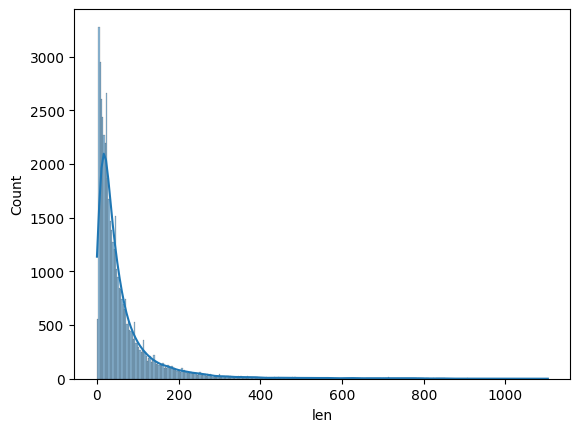

In [35]:
# sns.histplot(data['len'],kind='kde')
sns.histplot(data=data['len'],multiple="stack",kde=True)
data['len'].to_csv(f'{path}wordlen.csv',index=False)
plt.savefig(f'{path}wordlen.png',bbox_inches='tight')

In [36]:
# import tensorflow as tf
# import numpy as np
# # Load GloVe embeddings
# embeddings_index = {}
# with open('/content/drive/MyDrive/glove.6B.300d.txt', encoding='utf-8') as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         coefs = np.asarray(values[1:], dtype='float32')
#         embeddings_index[word] = coefs

In [37]:
# # import required libraries
# import numpy as np
# from numpy.linalg import norm

# A = embeddings_index['difficult']
# B = embeddings_index["problem"]
# # compute cosine similarity
# cosine = np.dot(A,B)/(norm(A)*norm(B))
# print("Cosine Similarity:", cosine)

In [38]:
import tensorflow as tf

In [39]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 200
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
Xsequences = tokenizer.texts_to_sequences(data['text'])

In [40]:
Xsequences = tf.keras.preprocessing.sequence.pad_sequences(Xsequences, maxlen=maxlen)

In [41]:
len(tokenizer.word_index)

110025

# Model

In [161]:
data.columns

Index(['text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'len'],
      dtype='object')

In [42]:
# Y = data['label'].factorize()[0]
# labels = Y
# arr = labels
# arr.shape
# labels = np.zeros((arr.size, arr.max()+1))
# labels.shape
# labels[np.arange(arr.size), arr] = 1
# labels
Y = np.array(data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']])
Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [43]:
np.array(data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']])

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xsequences,Y,test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = Xsequences[train.index],Xsequences[test.index],labels[train.index],labels[test.index]
# X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5, random_state=42)

In [45]:
y_train

array([[1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [46]:
embedding_dim = 80

In [47]:
# max_words = max_words-1

In [48]:
import tensorflow as tf


In [49]:
Xsequences.dtype

dtype('int32')

In [50]:
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax

In [51]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [52]:
y_test.shape

(9575, 6)

In [ ]:
y_ = model.predict(X_test)
y_ = y_.reshape(-1,)
y_.shape

16/16 [==============================] - 2s 118ms/step


(500,)

In [ ]:
y_[y_ < 0.5] = 0

In [ ]:
y_

In [ ]:
y_

In [58]:
from sklearn.metrics import classification_report

def savemod(model,pa,path=path,y_test=y_test,X_test=X_test):
    # y_test
    y_ = model.predict(X_test)
    y1 = y_test.reshape(-1,) # np.zeros((y_test.shape[0],))
    y_ = y_.reshape(-1,)
    y2 = y_   # np.zeros((y_test.shape[0],))
    y2[y2 < 0.5] = 0
    y2[y2 > 0.5] = 1

    # for i in range(len(y_test)):
        # y1[i] = 1 if y1> 0.5 else 0
        # y2[i] = y_test[i].argmax()
    ff = pd.DataFrame(columns=['real','predicted'])
    ff['real'] = y2
    ff['predicted'] = y1
    print(classification_report(y1,y2))
    ff.to_csv(f'{path}{pa}.csv',index=False)

In [54]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    tf.keras.layers.Conv1D(32, 2, activation='relu',),
    # tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),

    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 80)           800000    
                                                                 
 conv1d (Conv1D)             (None, 199, 32)           5152      
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                        

In [55]:
X_val, y_val =  X_test, y_test

In [56]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=20,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                es
                                ],)

Epoch 1/20
1197/1197 [==============================] - 152s 115ms/step - loss: 0.1254 - accuracy: 0.8596 - val_loss: 0.0702 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 2/20
1197/1197 [==============================] - 22s 19ms/step - loss: 0.0604 - accuracy: 0.9872 - val_loss: 0.0603 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 3/20
1197/1197 [==============================] - 14s 12ms/step - loss: 0.0527 - accuracy: 0.9880 - val_loss: 0.0602 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 4/20
1197/1197 [==============================] - ETA: 0s - loss: 0.0492 - accuracy: 0.9814
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1197/1197 [==============================] - 11s 9ms/step - loss: 0.0492 - accuracy: 0.9814 - val_loss: 0.0598 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 5/20
1197/1197 [==============================] - 10s 9ms/step - loss: 0.0452 - accuracy: 0.9780 - val_loss: 0.0603 - val_accuracy: 0.9942 - lr: 5.0000e-04
Epoch 6/20
1197/1197 [================

In [59]:
savemod(model=model,pa='Albert',y_test=y_val,X_test=X_val)

300/300 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     55257
           1       0.77      0.67      0.72      2193

    accuracy                           0.98     57450
   macro avg       0.88      0.83      0.85     57450
weighted avg       0.98      0.98      0.98     57450



In [64]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    tf.keras.layers.Conv1D(32, 2, activation='relu',),
    # tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),

    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 80)           800000    
                                                                 
 conv1d_4 (Conv1D)           (None, 199, 32)           5152      
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 6)                 390       
                                                      

In [65]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=20,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                es
                                ],)

Epoch 1/20
1197/1197 [==============================] - 104s 82ms/step - loss: 0.0935 - accuracy: 0.8689 - val_loss: 0.0616 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 2/20
1197/1197 [==============================] - 31s 26ms/step - loss: 0.0540 - accuracy: 0.9815 - val_loss: 0.0556 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 3/20
1197/1197 [==============================] - 26s 21ms/step - loss: 0.0467 - accuracy: 0.9849 - val_loss: 0.0575 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 4/20
1196/1197 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.9830
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1197/1197 [==============================] - 26s 21ms/step - loss: 0.0423 - accuracy: 0.9829 - val_loss: 0.0615 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 5/20
1197/1197 [==============================] - 26s 22ms/step - loss: 0.0361 - accuracy: 0.9789 - val_loss: 0.0636 - val_accuracy: 0.9942 - lr: 5.0000e-04
Epoch 6/20
1197/1197 [===============

In [66]:
savemod(model=model,pa='cnnlstm',y_test=y_val,X_test=X_val)

300/300 [==============================] - 3s 7ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     55257
           1       0.80      0.64      0.71      2193

    accuracy                           0.98     57450
   macro avg       0.89      0.82      0.85     57450
weighted avg       0.98      0.98      0.98     57450



In [67]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    tf.keras.layers.Conv1D(32, 2, activation='relu',),
    tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),

    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 80)           800000    
                                                                 
 conv1d_5 (Conv1D)           (None, 199, 32)           5152      
                                                                 
 conv1d_6 (Conv1D)           (None, 198, 64)           4160      
                                                                 
 bidirectional_4 (Bidirectio  (None, 198, 64)          24832     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)               

In [68]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=20,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                es
                                ],)

Epoch 1/20
1197/1197 [==============================] - 111s 86ms/step - loss: 0.0938 - accuracy: 0.8954 - val_loss: 0.0602 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 2/20
1197/1197 [==============================] - 46s 38ms/step - loss: 0.0550 - accuracy: 0.9861 - val_loss: 0.0550 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 3/20
1197/1197 [==============================] - 49s 41ms/step - loss: 0.0483 - accuracy: 0.9887 - val_loss: 0.0554 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 4/20
1197/1197 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9770
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1197/1197 [==============================] - 41s 34ms/step - loss: 0.0431 - accuracy: 0.9770 - val_loss: 0.0579 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 5/20
1197/1197 [==============================] - 42s 35ms/step - loss: 0.0370 - accuracy: 0.9667 - val_loss: 0.0653 - val_accuracy: 0.9942 - lr: 5.0000e-04
Epoch 6/20
1197/1197 [===============

In [69]:
savemod(model=model,pa='2lstm-2cnn',y_test=y_val,X_test=X_val)

300/300 [==============================] - 5s 11ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     55257
           1       0.78      0.66      0.71      2193

    accuracy                           0.98     57450
   macro avg       0.88      0.83      0.85     57450
weighted avg       0.98      0.98      0.98     57450



In [70]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    tf.keras.layers.Conv1D(32, 2, activation='relu',),
    tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),

    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 80)           800000    
                                                                 
 conv1d_7 (Conv1D)           (None, 199, 32)           5152      
                                                                 
 conv1d_8 (Conv1D)           (None, 198, 64)           4160      
                                                                 
 bidirectional_6 (Bidirectio  (None, 198, 64)          24832     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 64)               

In [71]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=20,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                es
                                ],)

Epoch 1/20
1197/1197 [==============================] - 114s 88ms/step - loss: 0.0978 - accuracy: 0.8594 - val_loss: 0.0584 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 2/20
1197/1197 [==============================] - 50s 42ms/step - loss: 0.0538 - accuracy: 0.9829 - val_loss: 0.0557 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 3/20
1197/1197 [==============================] - 45s 38ms/step - loss: 0.0469 - accuracy: 0.9866 - val_loss: 0.0575 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 4/20
1197/1197 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9900
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1197/1197 [==============================] - 42s 35ms/step - loss: 0.0421 - accuracy: 0.9900 - val_loss: 0.0615 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 5/20
1197/1197 [==============================] - 44s 37ms/step - loss: 0.0356 - accuracy: 0.9719 - val_loss: 0.0622 - val_accuracy: 0.9942 - lr: 5.0000e-04
Epoch 6/20
1197/1197 [===============

In [72]:
savemod(model=model,pa='2lstm-2cnn',y_test=y_val,X_test=X_val)

300/300 [==============================] - 5s 12ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     55257
           1       0.75      0.68      0.71      2193

    accuracy                           0.98     57450
   macro avg       0.87      0.84      0.85     57450
weighted avg       0.98      0.98      0.98     57450



In [73]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    # tf.keras.layers.Conv1D(32, 2, activation='relu',),
    # tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 200, 80)           800000    
                                                                 
 bidirectional_8 (Bidirectio  (None, 200, 64)          28928     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 200, 64)          24832     
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                      

In [74]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=20,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                es
                                ],)

Epoch 1/20
1197/1197 [==============================] - 131s 99ms/step - loss: 0.1039 - accuracy: 0.8047 - val_loss: 0.0651 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 2/20
1197/1197 [==============================] - 59s 49ms/step - loss: 0.0569 - accuracy: 0.9702 - val_loss: 0.0585 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 3/20
1197/1197 [==============================] - 56s 46ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.0596 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 4/20
1196/1197 [============================>.] - ETA: 0s - loss: 0.0429 - accuracy: 0.9922
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1197/1197 [==============================] - 55s 46ms/step - loss: 0.0429 - accuracy: 0.9922 - val_loss: 0.0611 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 5/20
1197/1197 [==============================] - 54s 45ms/step - loss: 0.0366 - accuracy: 0.9917 - val_loss: 0.0644 - val_accuracy: 0.9942 - lr: 5.0000e-04
Epoch 6/20
1197/1197 [===============

In [75]:
savemod(model=model,pa='4LSTM',y_test=y_val,X_test=X_val)

300/300 [==============================] - 7s 16ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     55257
           1       0.77      0.64      0.70      2193

    accuracy                           0.98     57450
   macro avg       0.88      0.82      0.84     57450
weighted avg       0.98      0.98      0.98     57450



In [76]:
data = pd.read_csv('/content/drive/MyDrive/work 39 toxisity/Albert.csv')
yt = data['real'].to_numpy()
y = data['real'].to_numpy()


,real,predicted
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
57445,0.0,0
57446,0.0,0
57447,0.0,0
57448,0.0,0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Layer
from tensorflow.keras.layers import Embedding, Input, GlobalAveragePooling1D, Dense
# from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, Model
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [ ]:
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [
             Dense(2 * 6 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(2 * 5 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(2 * 4 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(2 * 3 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(3 * 2 * ff_dim, activation="relu"),
             Dropout(rate),
             Dense(embed_dim)]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-12)
        self.layernorm2 = LayerNormalization(epsilon=1e-12)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim,
                                   weights=[embedding_matrix],
                                   trainable=True)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim,trainable=False)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
embed_dim = 300  # Embedding size for each token
num_heads = 6  # Number of attention heads
ff_dim = 128  # Hidden layer size in feed forward network inside transformer

inputs = Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, max_words, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = GlobalAveragePooling1D()(x)
# x = Dropout(0.1)(x)
# x = Dense(128, activation="relu")(x)
# x = Dropout(0.1)(x)
outputs = Dense(6, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])


model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 token_and_position_embeddin  (None, 64, 300)          619200    
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_1 (Transf  (None, 64, 300)          7516832   
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_13 (Dense)            (None, 6)                 1806

In [ ]:
# Train model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=12,
          batch_size=32,
                              callbacks =[learning_rate_reduction,
                                es
                                ],
          )

Epoch 1/12
400/400 [==============================] - 16s 41ms/step - loss: 0.1378 - accuracy: 0.9407 - val_loss: 0.3234 - val_accuracy: 0.8932 - lr: 0.0010
Epoch 2/12
400/400 [==============================] - 17s 42ms/step - loss: 0.1293 - accuracy: 0.9430 - val_loss: 0.3609 - val_accuracy: 0.8957 - lr: 0.0010
Epoch 3/12
400/400 [==============================] - 18s 45ms/step - loss: 0.1210 - accuracy: 0.9461 - val_loss: 0.3549 - val_accuracy: 0.8910 - lr: 0.0010
Epoch 4/12
400/400 [==============================] - 16s 41ms/step - loss: 0.1134 - accuracy: 0.9499 - val_loss: 0.3884 - val_accuracy: 0.8939 - lr: 0.0010
Epoch 5/12
400/400 [==============================] - ETA: 0s - loss: 0.1079 - accuracy: 0.9522
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
400/400 [==============================] - 16s 40ms/step - loss: 0.1079 - accuracy: 0.9522 - val_loss: 0.3890 - val_accuracy: 0.8882 - lr: 0.0010
Epoch 6/12
400/400 [==============================] - 

In [ ]:
savemod(model=model,pa='transformer-without')

100/100 [==============================] - 2s 14ms/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare your text data and labels
texts = [...]  # List of input texts
labels = [...]  # List of corresponding labels

# Tokenize and preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences to have the same length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Split the data into training and validation sets
train_ratio = 0.8
train_size = int(len(padded_sequences) * train_ratio)

train_sequences = padded_sequences[:train_size]
train_labels = labels[:train_size]
val_sequences = padded_sequences[train_size:]
val_labels = labels[train_size:]

# Create the Transformer Encoder model
def transformer_encoder(vocab_size, max_sequence_length):
    inputs = tf.keras.Input(shape=(max_sequence_length,))
    embedding_layer = tf.keras.layers.Embedding(vocab_size, 128)(inputs)
    positional_encoding = tf.keras.layers.Embedding(max_sequence_length, 128)(tf.range(max_sequence_length))
    encoded_inputs = embedding_layer + positional_encoding
    encoder_outputs = tf.keras.layers.GlobalAveragePooling1D()(encoded_inputs)
    dense = Dense(64, activation='relu')(encoder_outputs)
    dropout = Dropout(0.2)(dense)
    outputs = Dense(num_classes, activation='softmax')(dropout)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Set the number of classes for classification
num_classes = len(set(labels))

# Instantiate the model
model = transformer_encoder(vocab_size, max_sequence_length)

# Compile the model
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

# Define callbacks (optional)
early_stopping = EarlyStopping(patience=3)

# Train the model
batch_size = 32
epochs = 10
model.fit(train_sequences, train_labels, validation_data=(val_sequences, val_labels),
          batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])

# Once trained, you can use the model for predictions
test_sequences = pad_sequences(tokenizer.texts_to_sequences(test_texts), maxlen=max_sequence_length, padding='post')
predictions = model.predict(test_sequences)


In [21]:
SEQ_LEN = 230

In [22]:
pip install transformers

In [23]:
from transformers import AutoTokenizer

In [24]:
tokenizer = AutoTokenizer.from_pretrained('albert-base-v2')

In [25]:
# SEQ_LEN = 22

In [26]:
# data = data.sample(frac=0.1)

In [27]:
Xids = np.zeros((len(data),SEQ_LEN))
Xmask = np.zeros((len(data),SEQ_LEN))


In [28]:
Xids.shape

(15957, 230)

In [29]:
for i, sequence in enumerate(data['text']):
    tokens = tokenizer.encode_plus(
    sequence,
    max_length = 230,
    truncation=True,
    padding="max_length",
    add_special_tokens=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='tf'
    )
    Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [30]:
data

,text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len
134637,im sorry i am sorry that i was an ass to you o...,0,0,1,0,0,0,55
79601,nina if you want to determine if brief chronic...,0,0,0,0,0,0,22
7264,i am not glitch turner but as everyone seems t...,0,0,0,0,0,0,233
75487,media prostitute is dead this little man who i...,0,0,1,0,1,0,39
102068,that wasnt a prudent decision,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...
23086,the article stands by itself now no need to me...,0,0,0,0,0,0,11
58032,please do not vandalize pages as you did with ...,0,0,0,0,0,0,27
158679,afd potentially of interest to you because you...,0,0,0,0,0,0,27
104988,thank you thats very kind of you talk,0,0,0,0,0,0,8


In [31]:
# arr = data['label'].factorize()[0]
# arr.shape

In [32]:
# labels = np.zeros((arr.size, arr.max()+1))
# labels.shape

In [33]:
# # labels[np.arange(arr.size), arr] = 1
# labels = data['label_num']

In [34]:
import tensorflow as tf

In [35]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [36]:
data.columns

Index(['text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'len'],
      dtype='object')

In [37]:
labels = np.array(data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']])

In [38]:
# df['label'] = df['Product'].factorize()[0]

In [39]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [40]:
# labels.sum(axis=0)

In [41]:
def map_func(input_ids, masks, labels):
    return{'input_ids': input_ids, 'attention_mask':masks}, labels

In [42]:
dataset = dataset.map(map_func)

In [43]:
dataset = dataset.shuffle(1000000).batch(48)

In [44]:
DS_LEN = len(list(dataset))

In [45]:
DS_LEN

333

In [46]:
# round(DS_LEN*SPLIT)

In [47]:
# len(train)

In [48]:
DATASET_SIZE = len(dataset)

In [49]:
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

full_dataset = dataset
full_dataset = full_dataset.shuffle(123424242)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [50]:
train = train_dataset
test = test_dataset
val = val_dataset

In [51]:
# SPLIT = 0.8
# train = dataset.take(round(DS_LEN*SPLIT))
# val = dataset.skip(round(DS_LEN*SPLIT))
# test = dataset.skip(round())
# # del dataset

In [52]:
from transformers import TFAutoModel

In [53]:
bert = TFAutoModel.from_pretrained('albert-base-v2')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['predictions.LayerNorm.weight', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.LayerNorm.bias', 'predictions.bias']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


In [54]:
labels.shape

(15957, 6)

In [55]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')

embeddings = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.GlobalMaxPooling1D()(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.Dense(32, activation = 'relu')(X)
# X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(32, activation = 'relu')(X)
y = tf.keras.layers.Dense(6, activation = 'sigmoid' , name = 'outputs')(X)

model = tf.keras.Model(inputs=[input_ids, mask], outputs = y)

In [56]:
model.layers[2].trainable = False

In [57]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 230)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 230)]        0           []                               
                                                                                                  
 tf_albert_model (TFAlbertModel  TFBaseModelOutputWi  11683584   ['input_ids[0][0]',              
 )                              thPooling(last_hidd               'attention_mask[0][0]']         
                                en_state=(None, 230                                               
                                , 768),                                                       

In [58]:
optimizer = tf.keras.optimizers.Adam(0.1)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [59]:
import pandas as pd
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
import tensorflow as tf

In [60]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=7)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.7,
                                            min_lr=0.000001)

In [61]:
from tensorflow.keras.optimizers import Adam, Adamax,RMSprop
# Adamax(learning_rate=0.1)

In [62]:
# model.compile(optimizer=Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC(num_thresholds=3)])
model.compile(optimizer=RMSprop(learning_rate=1e-6), loss='binary_crossentropy', metrics=['accuracy','AUC'])

# tf.keras.utils.plot_model(ann_model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

In [64]:
num_epochs = 5
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

Epoch 1/5
233/233 [==============================] - 236s 1s/step - loss: 0.7946 - accuracy: 0.2735 - auc: 0.6211 - val_loss: 0.7832 - val_accuracy: 0.2704 - val_auc: 0.6196 - lr: 1.0000e-06
Epoch 2/5
233/233 [==============================] - 235s 1s/step - loss: 0.7724 - accuracy: 0.2734 - auc: 0.6266 - val_loss: 0.7674 - val_accuracy: 0.2651 - val_auc: 0.6309 - lr: 1.0000e-06
Epoch 3/5
233/233 [==============================] - 234s 1s/step - loss: 0.7548 - accuracy: 0.2767 - auc: 0.6206 - val_loss: 0.7467 - val_accuracy: 0.2786 - val_auc: 0.6394 - lr: 1.0000e-06
Epoch 4/5
233/233 [==============================] - ETA: 0s - loss: 0.7354 - accuracy: 0.2748 - auc: 0.6281

KeyboardInterrupt: ignored

In [ ]:
# model.load_weights(f'{path}checkpoint')

In [101]:
# model.save_weights(f'{path}checkpoint')

In [ ]:
num_epochs = 15
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

In [67]:
model.save_weights(f'{path}checkpoint')

In [ ]:
num_epochs = 50
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

In [69]:
model.save_weights(f'{path}checkpoint')

In [ ]:
savemod(model=model,pa='albert')

In [ ]:
import os

In [ ]:
# path = '/content/drive/MyDrive/checkpoint4/'
# os.mkdir(path)
model.load_weights(f'{path}checkpoint')

In [110]:
# precision = tf.keras.metrics.Precision()
# recall = tf.keras.metrics.Recall()
# accuracy = tf.keras.metrics.CategoricalAccuracy()
# auc = tf.keras.metrics.AUC(num_thresholds=6)
tr = []
pr = []
l = 0
# for k in range(len(val)):


for i,j in test.take(-1):
  # l += 1
  # print(l)
  s = model.predict(i,verbose=0)
  tr.append(np.array(j))
  pr.append(np.array(s))
#   precision.update_state(s,j)
#   accuracy.update_state(s,j)
#   auc.update_state(s,j)
#   recall.update_state(s,j)
# pre = precision.result().numpy()
# rec = recall.result().numpy()
# au = auc.result().numpy()
# acc = accuracy.result().numpy()
# print(pre,rec,au,acc)

In [111]:
yp = np.concatenate([y for y in pr], axis=0)

In [112]:
yt = np.concatenate([y for y in tr], axis=0)

In [113]:
# i= -4
# yp[i],yt[i]

In [114]:
ypt = yp

In [115]:
ypt[ypt>0.5] = 1
ypt[ypt<0.5] = 0

In [116]:
np.sum(ypt.reshape(-1,)==yt.reshape(-1,))/(ypt.shape[0]*ypt.shape[1])


0.9884141156462585

In [87]:
yt.sum(axis=1)

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
yp.shape,yt.shape

((449, 1), (449,))

In [ ]:
yp = yp.reshape(-1,)
yp.shape

(449,)

In [ ]:
y1 = yp
y2 = yt

# for i in range(len(yt)):
#   y1[i] = yp[i].argmax()
#   y2[i] = yt[i].argmax()

In [ ]:
y1[y1 > 0.5] = 1
y1[y1 < 0.5] = 0
y1

array([1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0.

In [ ]:
ff = pd.DataFrame(columns=['real','predicted'])
ff['real'] = y2
ff['predicted'] = y1

In [ ]:
ff.to_csv(f'/content/drive/MyDrive/emotion-detection/albert.csv',index=False)

In [ ]:
num_epochs = 1
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

104/104 [==============================] - 83s 794ms/step - loss: 0.1924 - accuracy: 0.9528 - precision_1: 0.9767 - recall_1: 0.9263 - auc_1: 0.9625 - val_loss: 0.1702 - val_accuracy: 0.9632 - val_precision_1: 0.9850 - val_recall_1: 0.9427 - val_auc_1: 0.9709 - lr: 1.0000e-05


In [ ]:
y2

array([ 8.,  0., 15., ...,  3.,  5.,  5.])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y1,y2))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       289
         1.0       0.99      0.99      0.99       160

    accuracy                           0.99       449
   macro avg       0.99      0.99      0.99       449
weighted avg       0.99      0.99      0.99       449



In [ ]:
print(classification_report(y1,y2))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       354
         1.0       0.93      1.00      0.96       126

    accuracy                           0.98       480
   macro avg       0.96      0.99      0.97       480
weighted avg       0.98      0.98      0.98       480



In [ ]:
y1 = np.concatenate([y for x, y in val], axis=0)

In [ ]:
X = [x for x,y in val]
Y = [y for x,y in val]

In [ ]:
y = model.predict(X[12])

4/4 [==============================] - 6s 1s/step


In [ ]:
np.sum(y2==y3)

36

In [ ]:
y

In [ ]:
Y[0]

In [ ]:
y3 = np.zeros((y.shape[0],1))
y2 = np.zeros((y.shape[0],1))

In [ ]:
for i in range(len(y2)):
  y3[i] = np.argmax(Y[12][i])
for i in range(len(y2)):
  y2[i] = np.argmax(y[i])


In [ ]:
np.sum(y1==y2)/y2.shape[0]

0.21942668591462158

In [ ]:
y2

array([[4.],
       [2.],
       [0.],
       ...,
       [1.],
       [1.],
       [2.]])

In [ ]:
real_labels

In [ ]:
import tensorflow as tf
import numpy as np

# Load your dataset
dataset = val

# Convert the dataset to NumPy arrays
features_np = np.array([x for x, _ in dataset.as_numpy_iterator()])
labels_np = np.array([y for _, y in dataset.as_numpy_iterator()])


<ipython-input-179-87c044d4acf3>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels_np = np.array([y for _, y in dataset.as_numpy_iterator()])


In [ ]:
labels_np

array([array([[0., 0., 0., 1., 0., 0.],
              [0., 0., 1., 0., 0., 0.],
              [0., 0., 0., 0., 0., 1.],
              [0., 1., 0., 0., 0., 0.],
              [0., 1., 0., 0., 0., 0.],
              [0., 0., 1., 0., 0., 0.],
              [0., 1., 0., 0., 0., 0.],
              [0., 1., 0., 0., 0., 0.],
              [0., 1., 0., 0., 0., 0.],
              [1., 0., 0., 0., 0., 0.],
              [0., 1., 0., 0., 0., 0.],
              [0., 0., 1., 0., 0., 0.],
              [0., 0., 0., 0., 0., 1.],
              [0., 0., 1., 0., 0., 0.],
              [0., 1., 0., 0., 0., 0.],
              [0., 0., 0., 1., 0., 0.],
              [0., 0., 1., 0., 0., 0.],
              [0., 1., 0., 0., 0., 0.],
              [0., 0., 0., 1., 0., 0.],
              [0., 0., 0., 1., 0., 0.],
              [1., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 1., 0.],
              [1., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 1.],
              [0., 0., 1., 0., 0., 0.],


In [ ]:
import tensorflow as tf

# Load your test data
# test_data = tf.data.Dataset.from_tensor_slices((test_features, test_labels))

# Load your trained model
# model = tf.keras.models.load_model('path/to/model')

# Generate predictions for your test data
predictions = model.predict(val)

# Convert predictions to labels
predicted_labels = tf.argmax(predictions, axis=1)

# Get the real labels from the test data
real_labels = val.map(lambda x, y: y)

# Evaluate the model performance
accuracy = tf.keras.metrics.CategoricalAccuracy()
accuracy.update_state(real_labels, predicted_labels)
print('Accuracy:', accuracy.result().numpy())


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(
    # X, y, random_state=0)
# clf = SVC(random_state=0).fit(X_train, y_train)
# y_pred = clf.decision_function(X_test)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix



In [ ]:
name = 'LSTM'

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/emotion-detection/resluts/lstm.csv')
y_test, y_pred = data['real'],data['predicted']
# print(classification_report(data['real'],data['predicted']))

In [ ]:
import numpy as np
np.array(data['real'])
np.array(data['predicted'])

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# data.to_csv(f'/content/drive/MyDrive/our work data/{name}.csv',index=False)

In [ ]:
y1 = np.zeros((y_pred.shape[0],int(y_pred.max()+1)))
y2 = np.zeros((y_pred.shape[0],int(y_pred.max()+1)))
for i,j in enumerate(y_test):
  y1[i][int(j)] = 1
for i,j in enumerate(y_pred):
  y2[i][int(j)] = 1
  # print(i,j)

In [ ]:
p = pd.DataFrame()
p['not spam'] = y1[:,0]
p['spam'] = y1[:,1]

p2 = pd.DataFrame()
p2['not spam'] = y2[:,0]
p2['spam'] = y2[:,1]


In [ ]:
# p.sum()

In [ ]:
# p2.sum()

In [ ]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test,y_pred)

In [ ]:
# pd.DataFrame(p.T@p2).sum(axis=0)

In [ ]:
# 18/137

In [ ]:
l = pd.DataFrame(p.T@p2)
# l/l.sum(axis=1)

In [ ]:
l = l.div(l.sum(axis=1), axis=0)

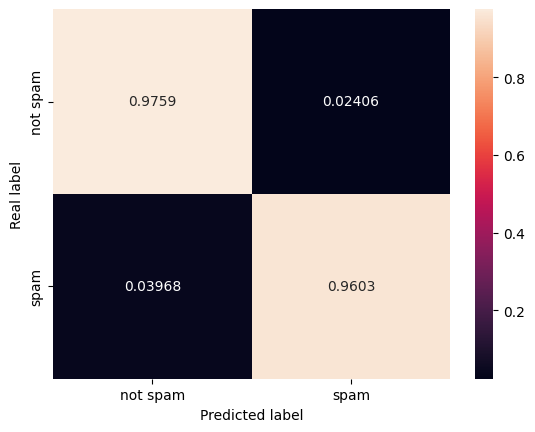

In [ ]:
sns.heatmap(l,annot=True,fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('Real label')
plt.savefig(f'/content/drive/MyDrive/emotion-detection/{name}_confusion_matrix.png',bbox_inches='tight')
pd.DataFrame(l).to_csv(f'/content/drive/MyDrive/emotion-detection/{name}_confusion_matrix.csv')

In [ ]:
# k = {}
# k[f'{name}'] = [accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred),roc_auc_score(y_test, y_pred)]

In [ ]:
# k

{'Dense': [0.9478957915831663,
  0.9416058394160584,
  0.8775510204081632,
  0.9084507042253521,
  0.9274118738404452],
 'Cnn': [0.97,
  0.9384615384615385,
  0.9457364341085271,
  0.942084942084942,
  0.9620865458952339],
 'Lstm': [0.972,
  0.9307692307692308,
  0.9603174603174603,
  0.9453125000000001,
  0.9681266445972329],
 'Cnn-Lstm': [0.972,
  0.9384615384615385,
  0.953125,
  0.9457364341085271,
  0.965809811827957],
 'Bert': [0.9933184855233853,
  0.9875,
  0.9937106918238994,
  0.9905956112852665,
  0.9934070700498807]}

In [ ]:
# print(classification_report(y_test, y_pred))

In [ ]:
# [accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred),roc_auc_score(y_test, y_pred)]

[0.9478957915831663,
 0.9416058394160584,
 0.8775510204081632,
 0.9084507042253521,
 0.9274118738404452]

In [ ]:
# y_pred

In [ ]:
# y1 = np.zeros((y_pred.shape[0],int(y_pred.max()+1)))
# y2 = np.zeros((y_pred.shape[0],int(y_pred.max()+1)))
# for i,j in enumerate(y_test):
#   y1[i][int(j)] = 1
# for i,j in enumerate(y_pred):
#   y2[i][int(j)] = 1
#   # print(i,j)

In [ ]:
# for i,j in enumerate(y_test):
#   y1[i][int(j)] = 1
# for i,j in enumerate(y_pred):
#   y2[i][int(j)] = 1
#   # print(i,j)

In [ ]:
# (np.sum(y1 != y2)/y1.shape[0])/2

In [ ]:
# import numpy as np

# noise = abs(np.random.normal(0,0.05,(y1.shape)))
# noise

In [ ]:
# y2 = y2 + noise
# for i,j in enumerate(y2):
#   y2[i] = j/j.sum()

In [ ]:
# y2

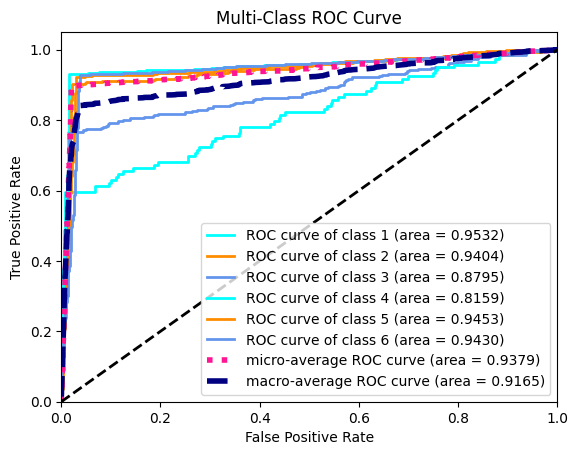

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Generate random classification results for 3 classes (can be replaced with your actual model predictions)
np.random.seed(0)
n_classes = int(y_pred.max())+1
n_samples = int(y1.shape[0])
# y_true = np.random.randint(0, n_classes, n_samples)
y_true = y1
# y_scores = np.random.rand(n_samples, n_classes)
y_scores = y2

# Binarize the labels for each class
y_bin = label_binarize(y_true, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average and compute AUC
mean_tpr /= n_classes

# Plot the ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i+1, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(all_fpr, mean_tpr,
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(np.mean(list(roc_auc.values()))),
         color='navy', linestyle='--', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.savefig(f'/content/drive/MyDrive/emotion-detection/curve/{name}.png',bbox_inches='tight')
pd.DataFrame(y1).to_csv(f'/content/drive/MyDrive/emotion-detection/curve/{name}_real.csv',index=False)
pd.DataFrame(y2).to_csv(f'/content/drive/MyDrive/emotion-detection/curve/{name}_predicted.csv',index=False)

plt.show()


In [ ]:
# k['Bert'] = [0.93, 0.94, 0.94, 0.94]

In [ ]:
f = pd.DataFrame.from_dict(k, orient='index')

In [ ]:
f.columns = ['accuracy','precision','recall','f1 score','roc-auc']

In [ ]:
# f = f/100
f

,accuracy,precision,recall,f1 score,roc-auc
Dense,0.947896,0.941606,0.877551,0.908451,0.927412
Cnn,0.970000,0.938462,0.945736,0.942085,0.962087
Lstm,0.972000,0.930769,0.960317,0.945313,0.968127
Cnn-Lstm,0.972000,0.938462,0.953125,0.945736,0.965810
Bert,0.993318,0.987500,0.993711,0.990596,0.993407


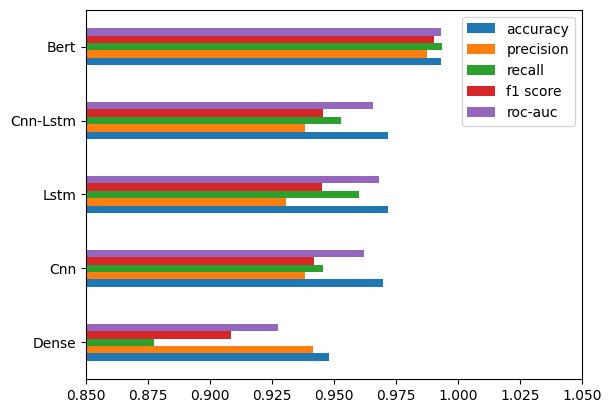

In [ ]:
f.plot(kind='barh')
plt.xlim(0.85,1.05)
plt.savefig('/content/drive/MyDrive/emotion-detection/performance.png',bbox_inches='tight')
f.to_csv('/content/drive/MyDrive/emotion-detection/performance.csv')

In [ ]:
import pandas as pd
f = pd.read_csv('/content/drive/MyDrive/emotion-detection/performance.csv')
f

,Unnamed: 0,accuracy,precision,recall,f1 score,roc-auc
0,Dense,0.947896,0.941606,0.877551,0.908451,0.927412
1,Cnn,0.970000,0.938462,0.945736,0.942085,0.962087
2,Lstm,0.972000,0.930769,0.960317,0.945312,0.968127
3,Cnn-Lstm,0.972000,0.938462,0.953125,0.945736,0.965810
4,Bert,0.993318,0.987500,0.993711,0.990596,0.993407


In [ ]:
f.index = f['Unnamed: 0']
f.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
f

,accuracy,precision,recall,f1 score,roc-auc
Unnamed: 0,,,,,
Dense,0.947896,0.941606,0.877551,0.908451,0.927412
Cnn,0.970000,0.938462,0.945736,0.942085,0.962087
Lstm,0.972000,0.930769,0.960317,0.945312,0.968127
Cnn-Lstm,0.972000,0.938462,0.953125,0.945736,0.965810
Bert,0.993318,0.987500,0.993711,0.990596,0.993407


In [ ]:
import seaborn as sns

In [ ]:
o = []
for i in f.columns:
  for j in range(5):
    o.append(i)
o

In [ ]:
p = pd.concat([f['accuracy'],f['precision'],f['recall'],f['f1 score'],f['roc-auc']])
p = pd.DataFrame(p)
p['metric'] = o
p

In [ ]:
p.columns = ['score','metric']

In [ ]:
p['model'] = p.index

In [ ]:
import matplotlib.pyplot as plt


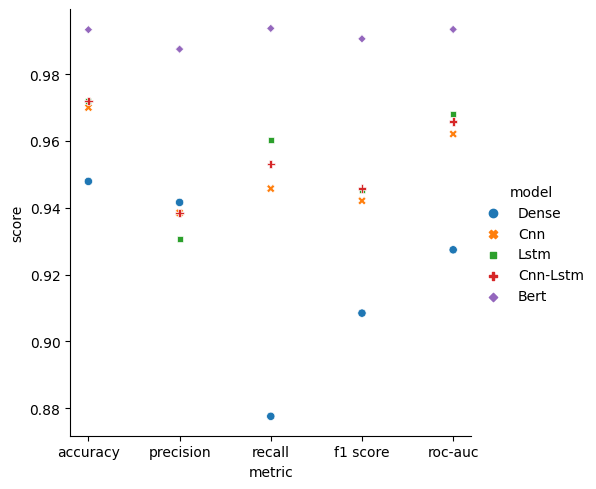

In [ ]:
sns.relplot(data=p, x="metric", y="score", hue="model",style='model')
plt.savefig('/content/drive/MyDrive/emotion-detection/performance2.png',bbox_inches='tight')
p.to_csv('/content/drive/MyDrive/emotion-detection/performance2.csv')